<h1>Описание проекта</h1>

Необходимо приоритизировать гипотезы (по фрейморкам ICE и RICE), запустить A/B тест и проанализировать результаты данного теста.

<h1>Описание данных</h1>

Файл /datasets/hypothesis.csv

Hypothesis — краткое описание гипотезы;

Reach — охват пользователей по 10-балльной шкале;

Impact — влияние на пользователей по 10-балльной шкале;

Confidence — уверенность в гипотезе по 10-балльной шкале;

Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


Файл /datasets/orders.csv

transactionId — идентификатор заказа;

visitorId — идентификатор пользователя, совершившего заказ;

date — дата, когда был совершён заказ;

revenue — выручка заказа;

group — группа A/B-теста, в которую попал заказ



Файл /datasets/visitors.csv

date — дата;

group — группа A/B-теста;

visitors — количество пользователей в указанную дату в указанной группе A/B-теста

<h1>Содержание</h1>

1. Приоритизация гипотез
2. Анализ A/B теста
3. Вывод

<h1>Приоритизация гипотез</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis.sort_values(by='ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000


In [5]:
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis.sort_values(by='rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


По определению во фреймворке RICE добавляется пункт Reach - охват пользователей. Соответственно, в зависимости от количества затронутых пользователей гипотезы поменяли свою важность.

<h1>Анализ A/B теста</h1>

Прочитаем результаты теста

In [6]:
orders = pd.read_csv('/datasets/orders.csv')
print(orders.info())
orders.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Сменим тип столбца date на datetime

In [7]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None


In [8]:
visitors = pd.read_csv('/datasets/visitors.csv')
print(visitors.info())
visitors.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Проверим, что уникальные пользователи входят только в одну группу.

In [10]:
print(orders.groupby('visitorId')['group'].nunique().sort_values(ascending=False))

visitorId
2654030115    2
3891541246    2
3941795274    2
1404934699    2
351125977     2
             ..
1476256851    1
1476741193    1
1484903144    1
1485964287    1
4283872382    1
Name: group, Length: 1031, dtype: int64


Видно, что некоторые пользователи входят сразу в 2 уникальные группы (и в А, и в В). Необходимо удалить такие данные.

In [11]:
orders_count = orders.groupby('visitorId')['group'].nunique().sort_values(ascending=False).reset_index()
orders_count = orders_count.query('group == 2')['visitorId'].unique()
print(len(orders_count))
orders = orders[~orders['visitorId'].isin(orders_count)]
print(orders.groupby('visitorId')['group'].nunique().sort_values(ascending=False))

58
visitorId
5114589       1
2908466434    1
2776274025    1
2785040378    1
2785527055    1
             ..
1426761187    1
1430210707    1
1438226485    1
1452540367    1
4283872382    1
Name: group, Length: 973, dtype: int64


Создаем массив уникальных пар дата - группа

In [12]:
dates_groups = orders[['date', 'group']].drop_duplicates()

Получим кумулятивные данные по заказам и посетителям и объединим таблицы

In [13]:
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                                                       orders['group'] == x['group'])].agg(
    {'date' : 'max',
     'group' : 'max',
     'transactionId' :'nunique',
     'visitorId' : 'nunique',
     'revenue' : 'sum'}), axis=1).sort_values(by=['date', 'group'])

visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                                           visitors['group'] == x['group'])].agg(
    {'date' : 'max',
     'group' : 'max',
     'visitors' : 'sum'}), axis=1).sort_values(by=['date', 'group'])

cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

Построим график кумулятивной выручки по группам. Для этого разделим кумулятивные данные по группам

In [14]:
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

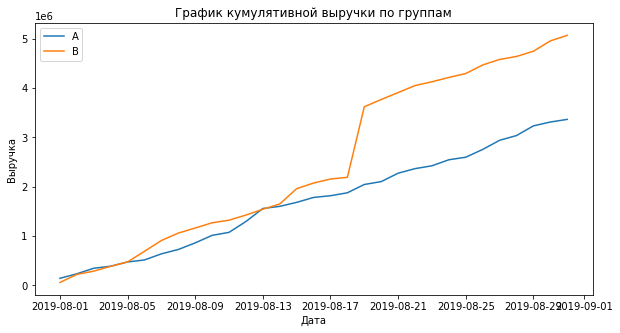

In [15]:
plt.figure(figsize=(10,5))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.legend()
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.show()

График выручки группы А практически линеен, что говорит о равномерном росте выручки. После 17 августа 2019 года выручка группы B резко возрасла. Возможно это выбросы.

Построим графики кумулятивного среднего чека (разделим выручку на число заказов)

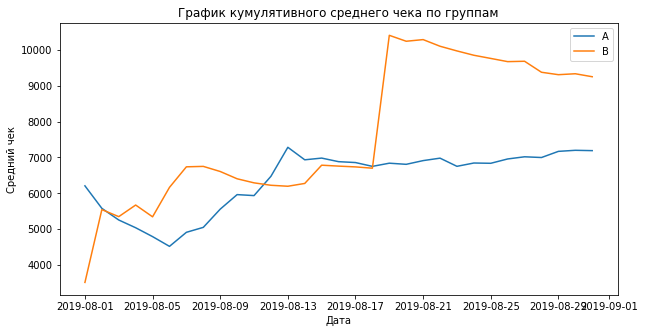

In [16]:
plt.figure(figsize=(10,5))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'] / cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'] / cumulative_revenue_b['orders'], label='B')
plt.legend() 
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.show()

Средний чек для группы А становится почти равномерным после середины исследования. Чек группы B в свою очередь, вероятнее всего, еще не установился.

Построим график относительного изменения кумулятивного среднего чека группы B к группе A

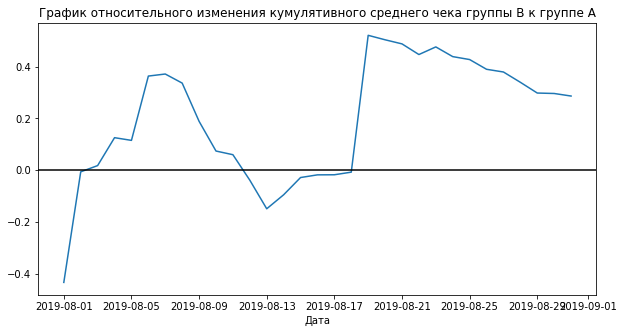

In [17]:
merged_cumulative_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b,
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['_a', '_b'])
plt.figure(figsize=(10,5))
plt.plot(merged_cumulative_revenue['date'],
         (merged_cumulative_revenue['revenue_b'] / merged_cumulative_revenue['orders_b']) / 
         (merged_cumulative_revenue['revenue_a'] / merged_cumulative_revenue['orders_a'])-1)
plt.axhline(y=0, color='black') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе А')
plt.xlabel('Дата')
plt.show()

По данному графику видно, что различия между средними чеками групп бывают очень велики, что говорит о наличии выбросов в данных.

Посмотрим график кумулятивной конверсии по группам

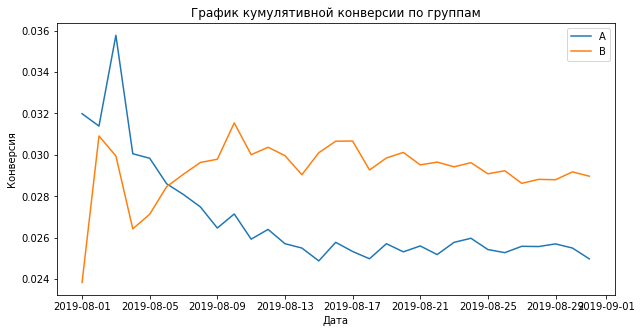

In [18]:
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']

cumulative_data_a = cumulative_data[cumulative_data['group']=='A']
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

plt.figure(figsize=(10,5))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.legend()
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.show()

Конверсии обеих групп практически установились, конверсия группы В заметно выше.

Построим график относительного изменения кумулятивной конверсии группы B к группе A

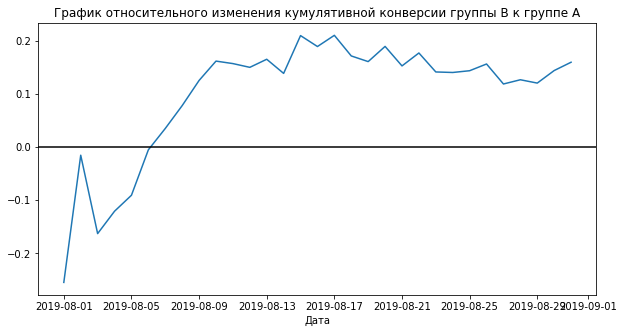

In [19]:
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']],
                                                                               left_on='date',
                                                                               right_on='date',
                                                                               how='left',
                                                                               suffixes=['_a', '_b'])

plt.figure(figsize=(10,5))
plt.plot(merged_cumulative_conversions['date'],
         merged_cumulative_conversions['conversion_b'] / merged_cumulative_conversions['conversion_a']-1,)
plt.axhline(y=0, color='black')
plt.title('График относительного изменения кумулятивной конверсии группы В к группе А')
plt.xlabel('Дата')
plt.show()

Прирост конверсии группы В колеблется около значения 0,15, хотя в начале теста группа В сильно проигрывала.

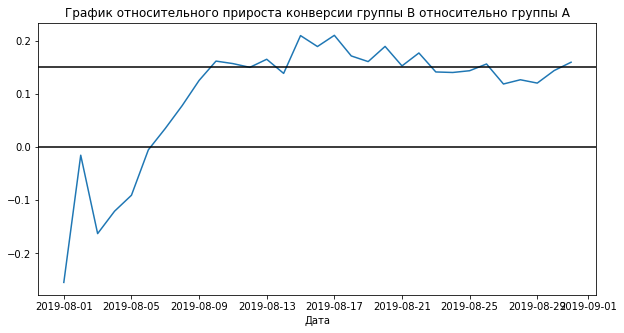

In [20]:
plt.figure(figsize=(10,5))
plt.plot(merged_cumulative_conversions['date'],
         merged_cumulative_conversions['conversion_b'] / merged_cumulative_conversions['conversion_a']-1,)
plt.axhline(y=0, color='black')
plt.axhline(y=0.15, color='black')
plt.title('График относительного прироста конверсии группы В относительно группы А')
plt.xlabel('Дата')
plt.show()

Построим график количества заказов по пользователям

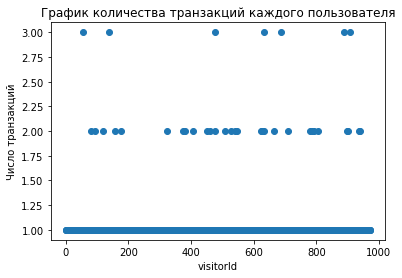

In [21]:
orders_by_visitors = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

orders_by_visitors.columns = ['visitorId', 'transactions']

x_values = pd.Series(range(0,len(orders_by_visitors)))

plt.scatter(x_values, orders_by_visitors['transactions'])
plt.title('График количества транзакций каждого пользователя')
plt.xlabel('visitorId')
plt.ylabel('Число транзакций')
plt.show()

В данных имеются несколько пользователей с 2 и 3 заказами. Посмотрим, являются ли эти пользователи аномальными. Для этого посчтиаем перцентили

In [22]:
np.percentile(orders_by_visitors['transactions'], [95, 99])

array([1., 2.])

Не более 5% пользователей оформляло больше 2 заказов, и менее 1% оформляло 3 заказа. Считаю, что число заказов стоит ограничить 2, а остальных пользователей считать аномальными.

То же самое сделаем с ценами заказов

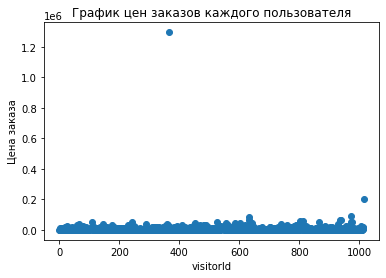

In [23]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('График цен заказов каждого пользователя')
plt.xlabel('visitorId')
plt.ylabel('Цена заказа')
plt.show()

По графику непонятно сколько заказов значительно отличаются от основной массы. Посмотрим перцентили.

In [24]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более 5% заказов дороже 26785 у.е. и не более 1% дороже 53904. Отбросим заказы дороже 30000.

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

Нулевая гипотеза: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

In [25]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1)

0.011


'0.160'

P-value ниже 0.05, значит нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный выигрыш группы B равен 16%

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [26]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
'{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean()-1)

0.829


'0.287'

P-value значительно больше 0.05. Значит, нельзя отвергать нулевую гипотезу. Получается, что в среднем чеке различий нет. При этом средний чек группы B значительно выше среднего чека группы A.

Очистим данные от аномалий и посчитаем статистическую значимость различий в конверсии и в среднем чеке между группами.

Для конверсии: нулевая гипотеза - различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

In [27]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
'{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)

0.010


'0.187'

Результаты почти не изменились: P-value все еще ниже, чем 0.05, а относительный выигрыш группы B вырос на 2.7%


Для среднего чека: нулевая гипотеза - различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [28]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)


"{0:.3f}".format(
    orders[
        np.logical_and(
            orders['group'] == 'B',
            np.logical_not(orders['visitorId'].isin(abnormalUsers)),
        )
    ]['revenue'].mean()
    / orders[
        np.logical_and(
            orders['group'] == 'A',
            np.logical_not(orders['visitorId'].isin(abnormalUsers)),
         )
    ]['revenue'].mean()
       - 1
) 

0.741


'-0.027'

P-value уменьшился, но все еще значительно больше 0.05, но при этом теперь средний чек группы А чуть больше.

<h1>Выводы</h1>

1. Имеются статистически значимые различия в среднем количестве заказов мужду группами как в сырых данных, так и в очищенных. (Группа В лидирует)

2. Различия в среднем чеке групп статистически незначимы.

3. График относительного прироста конверсии показывает, что конверсия группы В примерно на 15% выше конверсии группы А, но при этом это число постепенно уменьшается.

4. График среднего чека так же говорит, что группа В на данный момент лучше группы А, но опять же разница со временем становится меньше.

Исходя из этого, считаю, что тест стоит продолжить. Если в течение 2 недель средний чек группы В не сравняется со среднем чеком группы А, а уровень конверсии останется примерно на таком же уровне, то тест можно будет завершить, сказав, что группа В лучше. Если же уровень конверсии также упадет до 0 (или ниже), то тест опять нужно будет продолжить до выяснения может ли группа А стать лучше группы В.